In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [21]:
import klib as kb   

ModuleNotFoundError: No module named 'klib'

In [19]:
data = pd.read_csv('datasets/nobel.csv')

In [14]:
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [16]:
data.shape

(911, 18)

#### Column data types are not apprpriately represented. We use Python's conversion function by 'klib' library

In [22]:
def clean_col_names(df):
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    return df

In [24]:
clean_col_names = clean_col_names(data)

In [25]:
clean_col_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [29]:
clean_col_names.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [30]:
data.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [41]:
# Impute the missing values 
data['motivation'].fillna("No motivation provided", inplace = True)
data['birth_city'].fillna("No Birth city provided", inplace = True)
data['birth_country'].fillna("No Birth country provided", inplace = True)
data['sex'].fillna("No sex provided", inplace = True)


In [42]:
data["birth_date"] = pd.to_datetime(data["birth_date"], errors='coerce')
# calculate median of birth year 
median_birth_year = data['birth_date'].dropna().dt.year.median()

# Impute missing birth dates based on the median year
data["birth_date"] = data["birth_date"].fillna(
    pd.to_datetime(str(int(median_birth_year)) + "-01-01")
)

In [44]:
columns_to_drop = [
    "death_date",
    "death_city",
    "death_country",
    "organization_name",
    "organization_city",
    "organization_country"
]

# Only drop columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

if columns_to_drop:
    data.drop(columns_to_drop, axis=1, inplace=True)
else:
    print("No columns to drop")


No columns to drop


In [45]:
data.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male
3,1901,Peace,The Nobel Peace Prize 1901,No motivation provided,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male
4,1901,Peace,The Nobel Peace Prize 1901,No motivation provided,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male


In [46]:
data.shape

(911, 12)

In [47]:
data['prize_share'].value_counts()

1/1    344
1/2    306
1/3    201
1/4     60
Name: prize_share, dtype: int64

In [48]:
data['sex'].value_counts()

Male               836
Female              49
No sex provided     26
Name: sex, dtype: int64

In [49]:
data['birth_country'].value_counts()

United States of America           259
United Kingdom                      85
Germany                             61
France                              51
Sweden                              29
                                  ... 
Bosnia (Bosnia and Herzegovina)      1
Southern Rhodesia (Zimbabwe)         1
Brazil                               1
Iceland                              1
Ukraine                              1
Name: birth_country, Length: 122, dtype: int64

In [55]:
data['usa_born_winner'] = data['birth_country'] == 'United States of America'
data['decade'] = (np.floor(data['year'] /10) * 10).astype(int)
prop_usa_winners = data.groupby('decade', as_index=False)[
    'usa_born_winner'].mean()

In [56]:
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


In [57]:
sns.set()

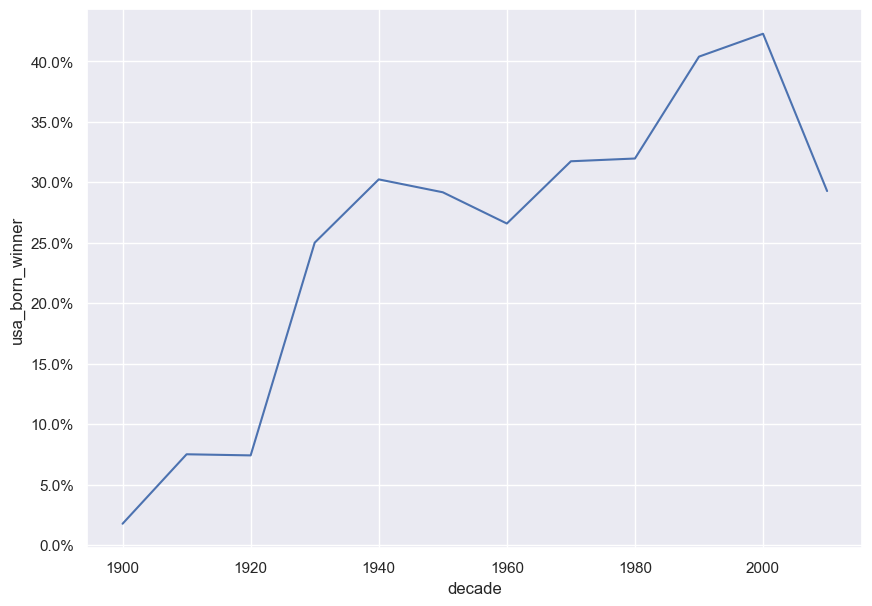

In [61]:
plt.rcParams['figure.figsize'] = [10, 7]

ax = sns.lineplot(x= prop_usa_winners['decade'],
                 y = prop_usa_winners['usa_born_winner'])

ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## Caluclating by gender

In [66]:
data['female_winner'] = data['sex'] == 'Female'
prop_female_winners = data.groupby(['decade', 'category'], as_index = False)[
    'female_winner'].mean()


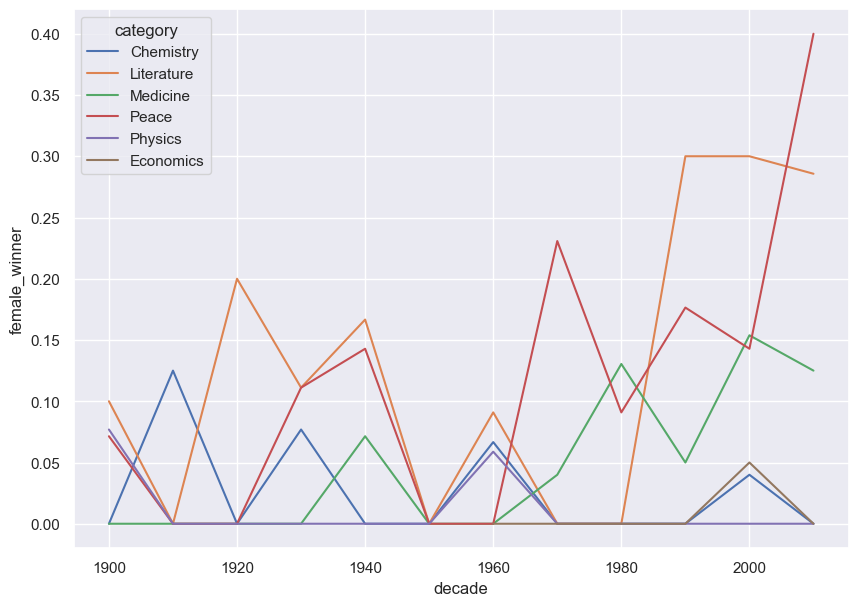

In [67]:
ax = sns.lineplot(x = 'decade', y = 'female_winner', hue = 'category', data = prop_female_winners)

## First Female woman to win a Nobel Prize 

In [68]:
first_female_winner = (
    data[data["sex"] == "Female"].sort_values(
        "year").reset_index(drop=True).iloc[0]
)

# Display the information of the first female winner
first_female_winner

year                                                            1903
category                                                     Physics
prize                                The Nobel Prize in Physics 1903
motivation         "in recognition of the extraordinary services ...
prize_share                                                      1/4
laureate_id                                                        6
laureate_type                                             Individual
full_name                                Marie Curie, née Sklodowska
birth_date                                       1867-11-07 00:00:00
birth_city                                                    Warsaw
birth_country                                Russian Empire (Poland)
sex                                                           Female
usa_born_winner                                                False
nobel                                                           1903
decade                            

## Nobel Prize winners who won more than 1 

In [69]:
data.groupby('full_name').filter(lambda group: len(group) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,usa_born_winner,nobel,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,False,1903,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,False,1911,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,No motivation provided,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1915-01-01,No Birth city provided,No Birth country provided,No sex provided,False,1917,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,No motivation provided,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1915-01-01,No Birth city provided,No Birth country provided,No sex provided,False,1944,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,True,1954,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,No motivation provided,1/1,515,Organization,Office of the United Nations High Commissioner...,1915-01-01,No Birth city provided,No Birth country provided,No sex provided,False,1954,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,True,1956,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,False,1958,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,No motivation provided,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,True,1962,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,No motivation provided,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,1915-01-01,No Birth city provided,No Birth country provided,No sex provided,False,1963,1960,False


## Age graph for Nobel Prize Winners

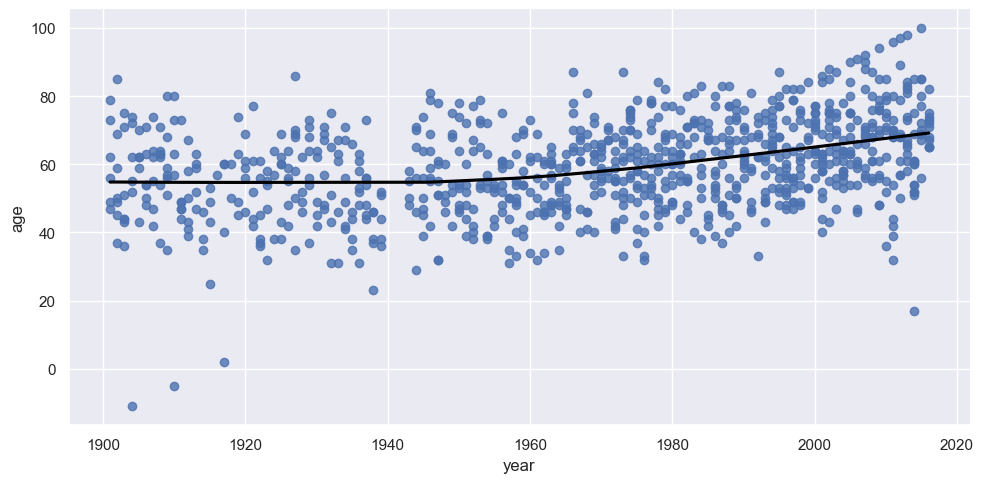

In [70]:
data['birth_date'] = pd.to_datetime(data['birth_date'])

# Calculating the age of Nobel Prize winners
data['age'] = data['year'] - data['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=data, lowess=True,
           aspect=2, line_kws={'color': 'black'})

In [ ]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', data=data, row='category',
           lowess=True, aspect=2, line_kws={'color': 'black'})